###**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For cleaner plots

sns.set(style="whitegrid")


###**2. Load the Dataset**

In [3]:
transactions = pd.read_csv('/content/QVI_purchase_behaviour.csv')
customers = pd.read_excel('/content/QVI_transaction_data.xlsx')


###**3. Quick Data Overview**

In [4]:
transactions.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
customers.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
print(transactions.info())
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(

In [7]:
transactions.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
customers.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


###**4. Data Cleaning**

In [9]:
# Check missing values

print(transactions.isnull().sum())
print(customers.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [10]:
# Check for duplicate rows

print(transactions.duplicated().sum())
print(customers.duplicated().sum())

0
1


In [11]:
# Drop duplicates
customers.drop_duplicates(inplace = True)

In [12]:
print(customers.duplicated().sum())

0


###**Checking for outliers in 'TOT_SALES' column**

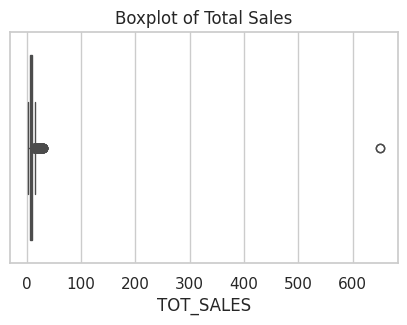

In [13]:
plt.figure(figsize=(5,3))
sns.boxplot(data = customers, x = 'TOT_SALES')
plt.title('Boxplot of Total Sales')
plt.show()

In [14]:
Q1 = customers['TOT_SALES'].quantile(0.25)
Q3 = customers['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = customers[(customers['TOT_SALES'] < (Q1 - 1.5 * IQR)) | (customers['TOT_SALES'] > (Q3 + 1.5 * IQR))]

print("Number of outliers:", outliers.shape[0]) #number of outlier rows detected.

Number of outliers: 578


In [15]:
transactions.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [16]:
# Finding extreme values

from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(customers['TOT_SALES']))

# Set threshold
threshold = 3

# Find extreme outliers
extreme_values = customers[z_scores > threshold]

# Remove extreme outliers
customers = customers[z_scores <= threshold]

# How many extreme values
print("Number of extreme values:", len(extreme_values))


Number of extreme values: 439


###**5. Feature Engineering**

In [17]:
# Extract Pack Size (grams) from PROD_NAME

customers['PACK_SIZE'] = customers['PROD_NAME'].str.extract(r'(\d+)g').astype(float)

In [18]:
# Extract Brand from PROD_NAME

customers['BRAND'] = customers['PROD_NAME'].str.split().str[0]

In [19]:
# Merge customer transactions with customer segments

data = pd.merge(customers, transactions, how = 'left', on = 'LYLTY_CARD_NBR')


In [20]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


###**6. Exploratory Data Analysis (EDA)**

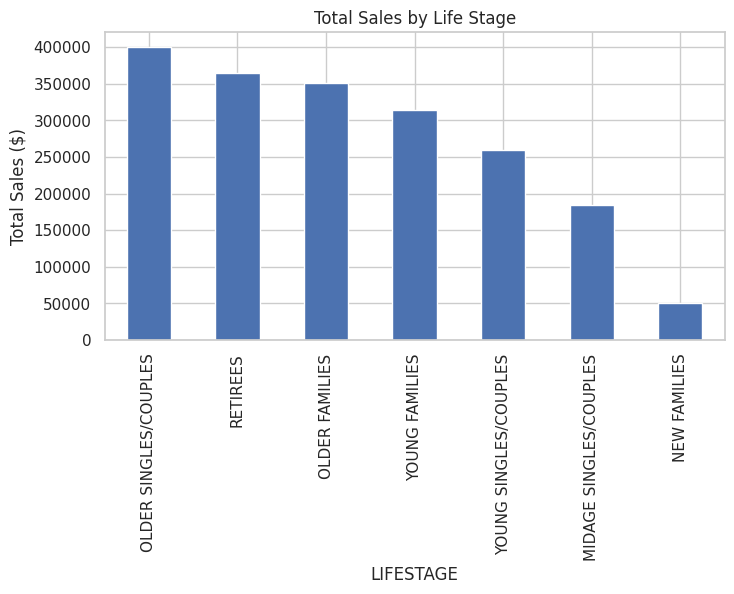

In [21]:
# Total sales by Life Stage

sales_by_lifestage = data.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
sales_by_lifestage.plot(kind='bar', figsize=(8,4), title='Total Sales by Life Stage')
plt.ylabel('Total Sales ($)')
plt.show()

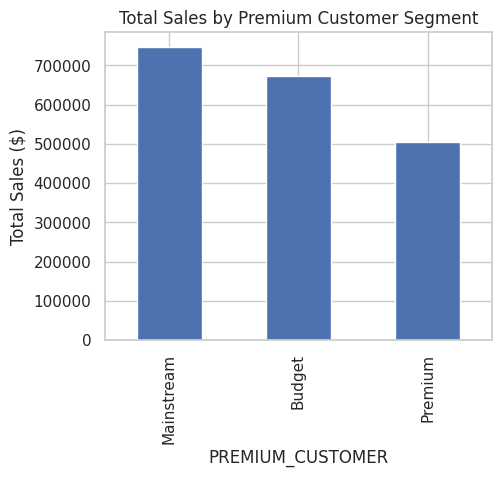

In [22]:
# Total sales by Premium Customer

sales_by_premium = data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False)
sales_by_premium.plot(kind='bar', figsize=(5,4), title='Total Sales by Premium Customer Segment')
plt.ylabel('Total Sales ($)')
plt.show()

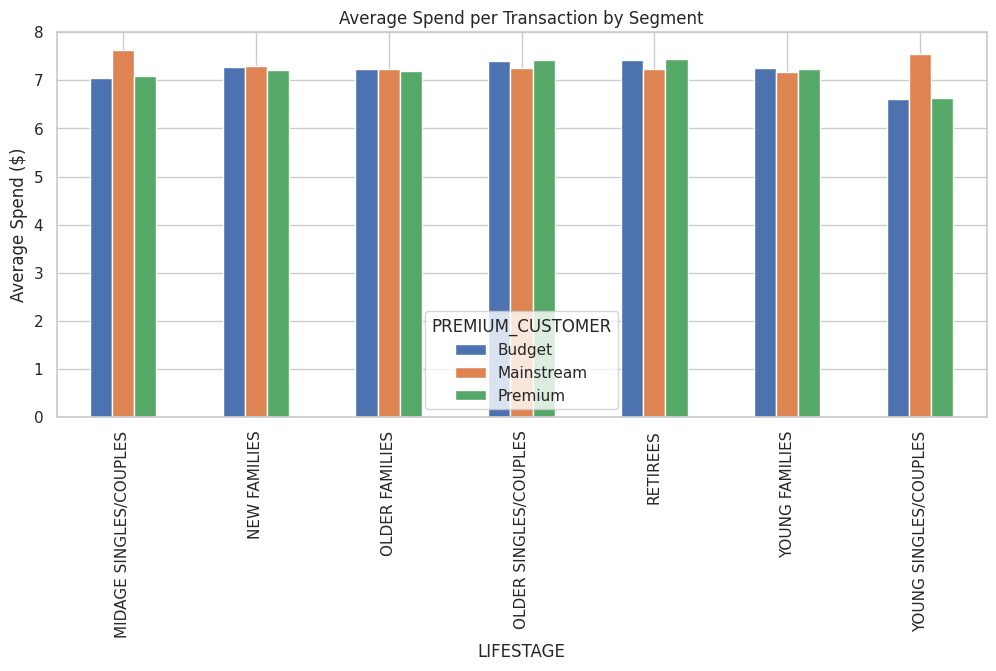

In [23]:
# Average spend per transaction by segment

avg_spend = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().unstack()
avg_spend.plot(kind='bar', figsize=(12,5), title='Average Spend per Transaction by Segment')
plt.ylabel('Average Spend ($)')
plt.show()

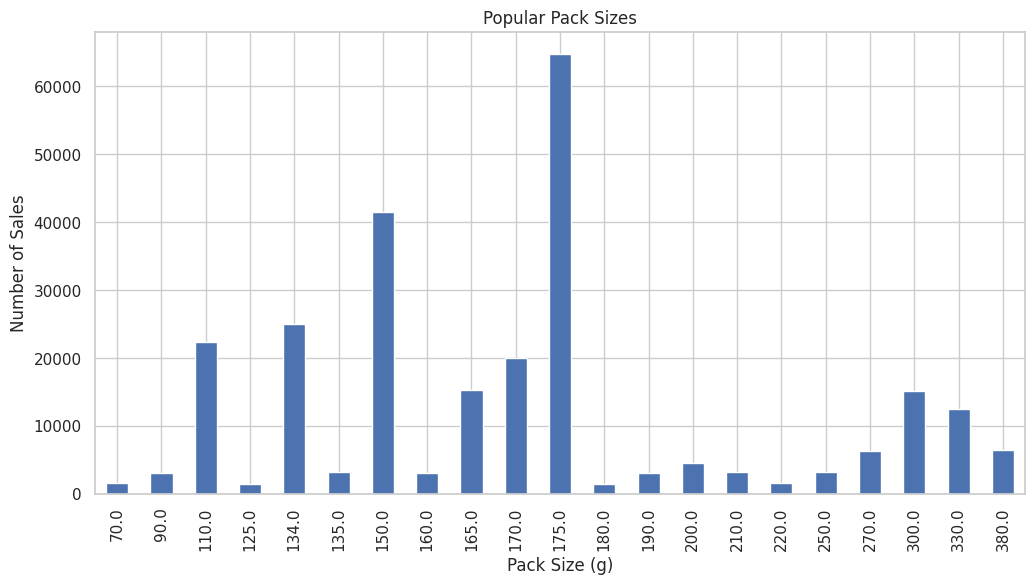

In [24]:
# Popular Pack Sizes

pack_size_counts = data['PACK_SIZE'].value_counts().sort_index()
pack_size_counts.plot(kind='bar', figsize=(12,6), title='Popular Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Sales')
plt.show()

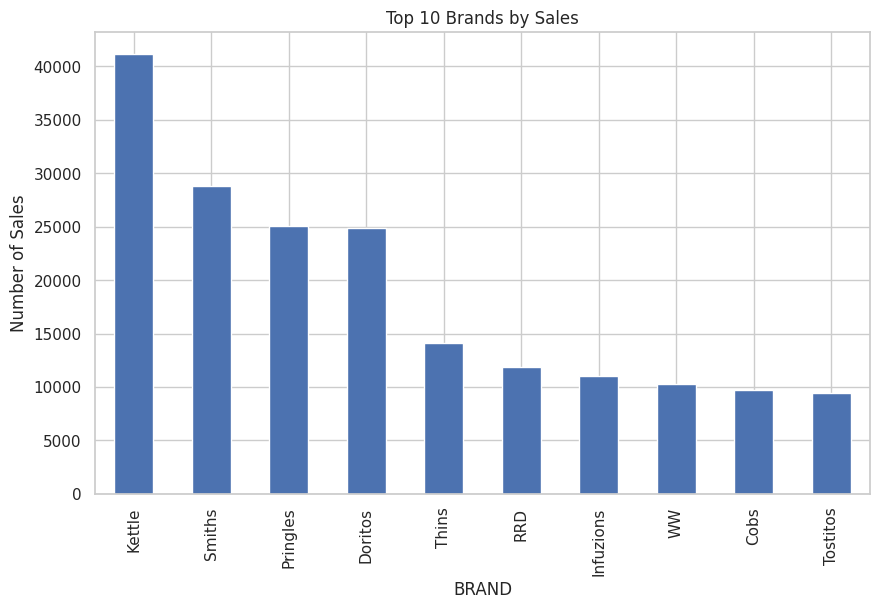

In [25]:
# Top Brands

top_brands = data['BRAND'].value_counts().head(10)
top_brands.plot(kind='bar', figsize = (10,6), title = 'Top 10 Brands by Sales')
plt.ylabel('Number of Sales')
plt.show()

###**7. Save the cleaned dataset**

In [26]:
data.to_csv('cleaned_data.csv', index = False)

In [27]:
data.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget


###**Bar plot: Pack Size vs Sales**


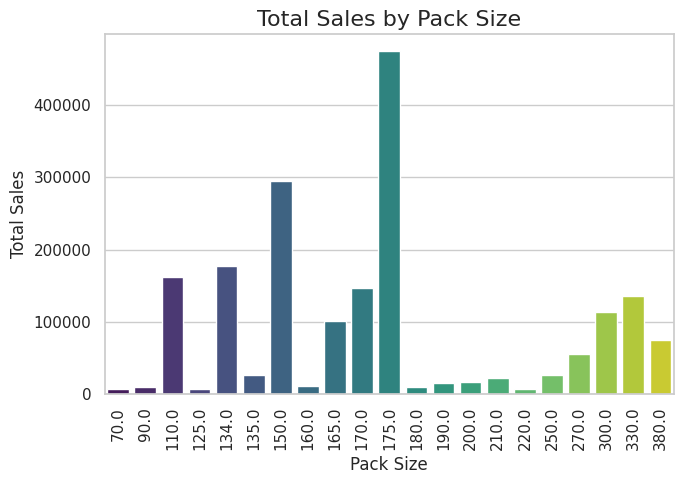

In [28]:
# Group data
packsize_sales_counts = data.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize = (7,5))
sns.barplot(x = packsize_sales_counts.index, y = packsize_sales_counts.values, palette = "viridis")
plt.title('Total Sales by Pack Size', fontsize = 16)
plt.ylabel('Total Sales')
plt.xlabel('Pack Size')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

###**Bar plot: Top Brands vs Sales**

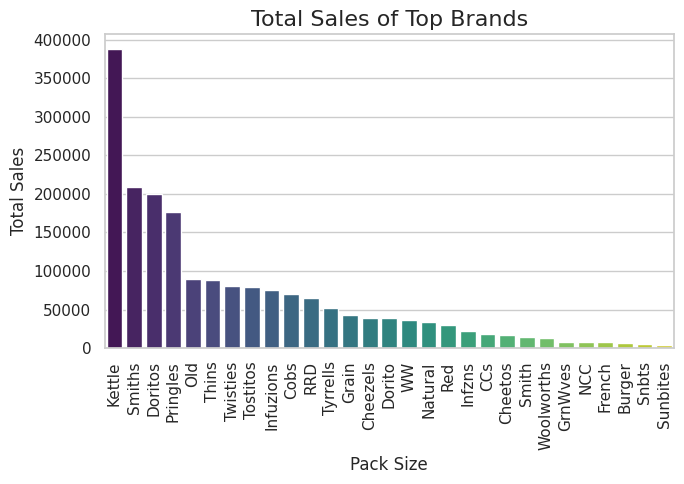

In [29]:
# Group data
top_brands_sales = data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize = (7,5))
sns.barplot(x = top_brands_sales.index, y = top_brands_sales.values, palette = "viridis")
plt.title('Total Sales of Top Brands', fontsize = 16)
plt.ylabel('Total Sales')
plt.xlabel('Pack Size')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

###**8. Key Insights**

- Older singles/Couples have high total sales.
- Mainstream and Premium customers spend differently.
- On an average, Mainstream customer are spending more compared to Budget and Premium customers.
- Larger pack sizes (e.g., 150g, 175g) are most popular among customers.
- The top three brands leading the sales these are Kettle, Smiths, Pringles. Where Kettle comes at number 1.


In [30]:
# Save in pdf

!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install nbconvert


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
